# **Import Dependencies**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from scipy import stats

# **Connect notebook with drive and import dataset from drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/user_behavior_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Display first 5 rows pf dataset**

In [7]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


# **Display last 5 rows of dataset**

In [8]:
data.tail()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3


# **Display 5 random rows from whole dataset**

In [11]:
data.sample(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
146,147,Samsung Galaxy S21,Android,443,7.4,2289,73,1026,33,Male,4
661,662,Xiaomi Mi 11,Android,138,3.1,947,29,545,48,Male,2
353,354,Samsung Galaxy S21,Android,379,7.5,1823,68,1075,53,Female,4
583,584,Google Pixel 5,Android,71,1.9,571,10,117,43,Female,1
548,549,Google Pixel 5,Android,383,6.6,2155,74,1360,45,Male,4


# **Display the shape of dataset**

In [12]:
data.shape

(700, 11)

# **Display name of all columns in datset**

In [13]:
data.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

# **Display unique values of each column**

In [14]:
data.nunique()

,0
User ID,700
Device Model,5
Operating System,2
App Usage Time (min/day),387
Screen On Time (hours/day),108
Battery Drain (mAh/day),628
Number of Apps Installed,86
Data Usage (MB/day),585
Age,42
Gender,2


# **Display data types of all columns**

In [16]:
data.dtypes

,0
User ID,int64
Device Model,object
Operating System,object
App Usage Time (min/day),int64
Screen On Time (hours/day),float64
Battery Drain (mAh/day),int64
Number of Apps Installed,int64
Data Usage (MB/day),int64
Age,int64
Gender,object


# **Statistics for numeric columns**

In [17]:
data.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


# **Measure asymmetry in data distribution**

In [19]:
data.skew

<bound method DataFrame.skew of      User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                           6.4                     1872   
1                           4.7                     1331   
2                           4.0                      761   
3                           4.8                     1676   
4                           4.3                     1367   
..                          ...                      ...   
695                         3.9                     1082   
696                         6.8                     1965   
697                         3.1                      942   
698                         1.7                      431   
699                         5.4                     1306   

     Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                          67                 1122   40    Male   
1                          42                  944   47  Female   
2                          32                  322   42    Male   
3                          56                  871   20    Male   
4                          58                  988   31  Female   
..                        ...                  ...  ...     ...   
695                        26                  381   22    Male   
696                        68                 1201   59    Male   
697                        22                  457   50  Female   
698                        13                  224   44    Male   
699                        49                  828   23  Female   

     User Behavior Class  
0                      4  
1                      3  
2                      2  
3                      3  
4                      3  
..                   ...  
695                    2  
696                    4  
697                    2  
698                    1  
699                    3  

[700 rows x 11 columns]>

# **Measure of tail heaviness**

In [21]:
data.kurt

<bound method DataFrame.kurt of      User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                           6.4                     1872   
1                           4.7                     1331   
2                           4.0                      761   
3                           4.8                     1676   
4                           4.3                     1367   
..                          ...                      ...   
695                         3.9                     1082   
696                         6.8                     1965   
697                         3.1                      942   
698                         1.7                      431   
699                         5.4                     1306   

     Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                          67                 1122   40    Male   
1                          42                  944   47  Female   
2                          32                  322   42    Male   
3                          56                  871   20    Male   
4                          58                  988   31  Female   
..                        ...                  ...  ...     ...   
695                        26                  381   22    Male   
696                        68                 1201   59    Male   
697                        22                  457   50  Female   
698                        13                  224   44    Male   
699                        49                  828   23  Female   

     User Behavior Class  
0                      4  
1                      3  
2                      2  
3                      3  
4                      3  
..                   ...  
695                    2  
696                    4  
697                    2  
698                    1  
699                    3  

[700 rows x 11 columns]>

# **Count missing values per column**

In [23]:
data.isnull().sum().sum()

0

# **Missing values as percentage**

In [ ]:
data.fillna(data.mean(), inplace=True)
# this will be run if there are only numeric columns

# **Display duplicate rows**

In [34]:
data.duplicated().sum()

0

# **Histogram for numerical columns**

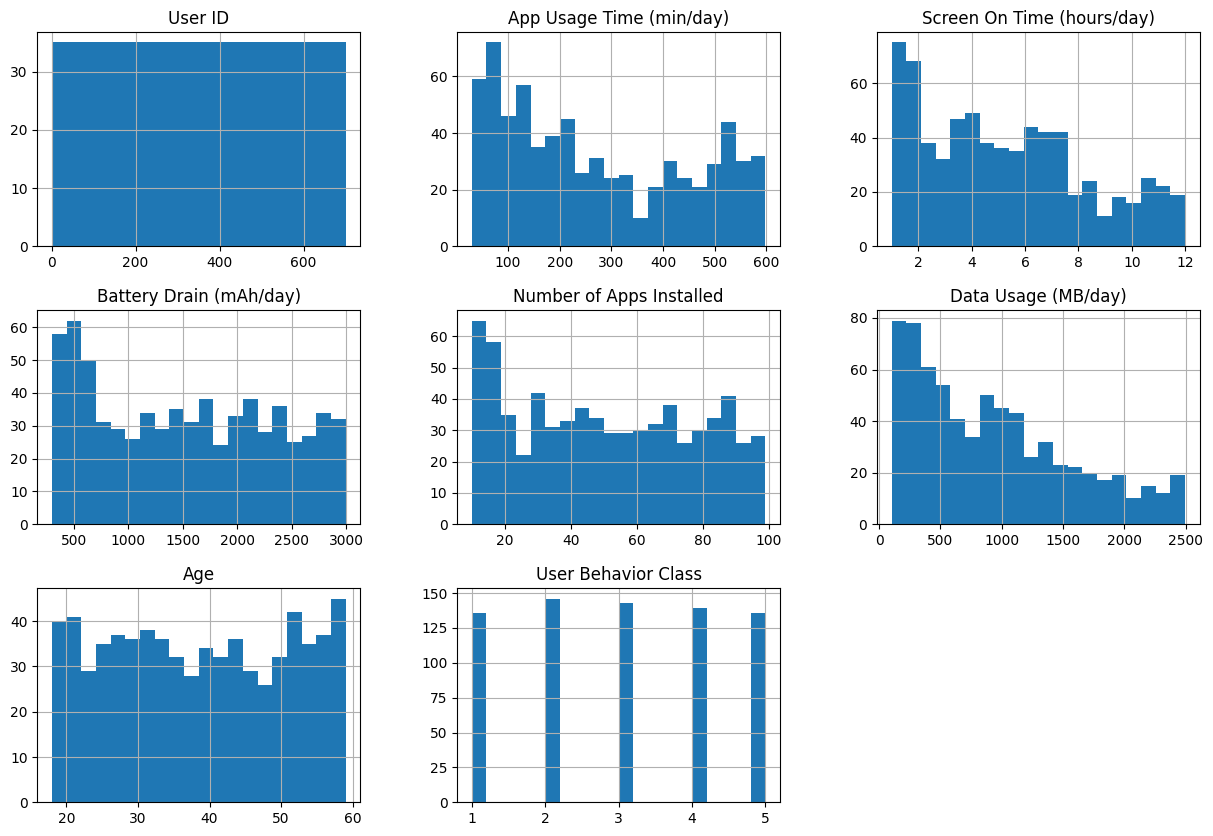

In [37]:
data.hist(bins=20, figsize=(15, 10))
plt.show()

# **Pairwise relationship for numerical columns**

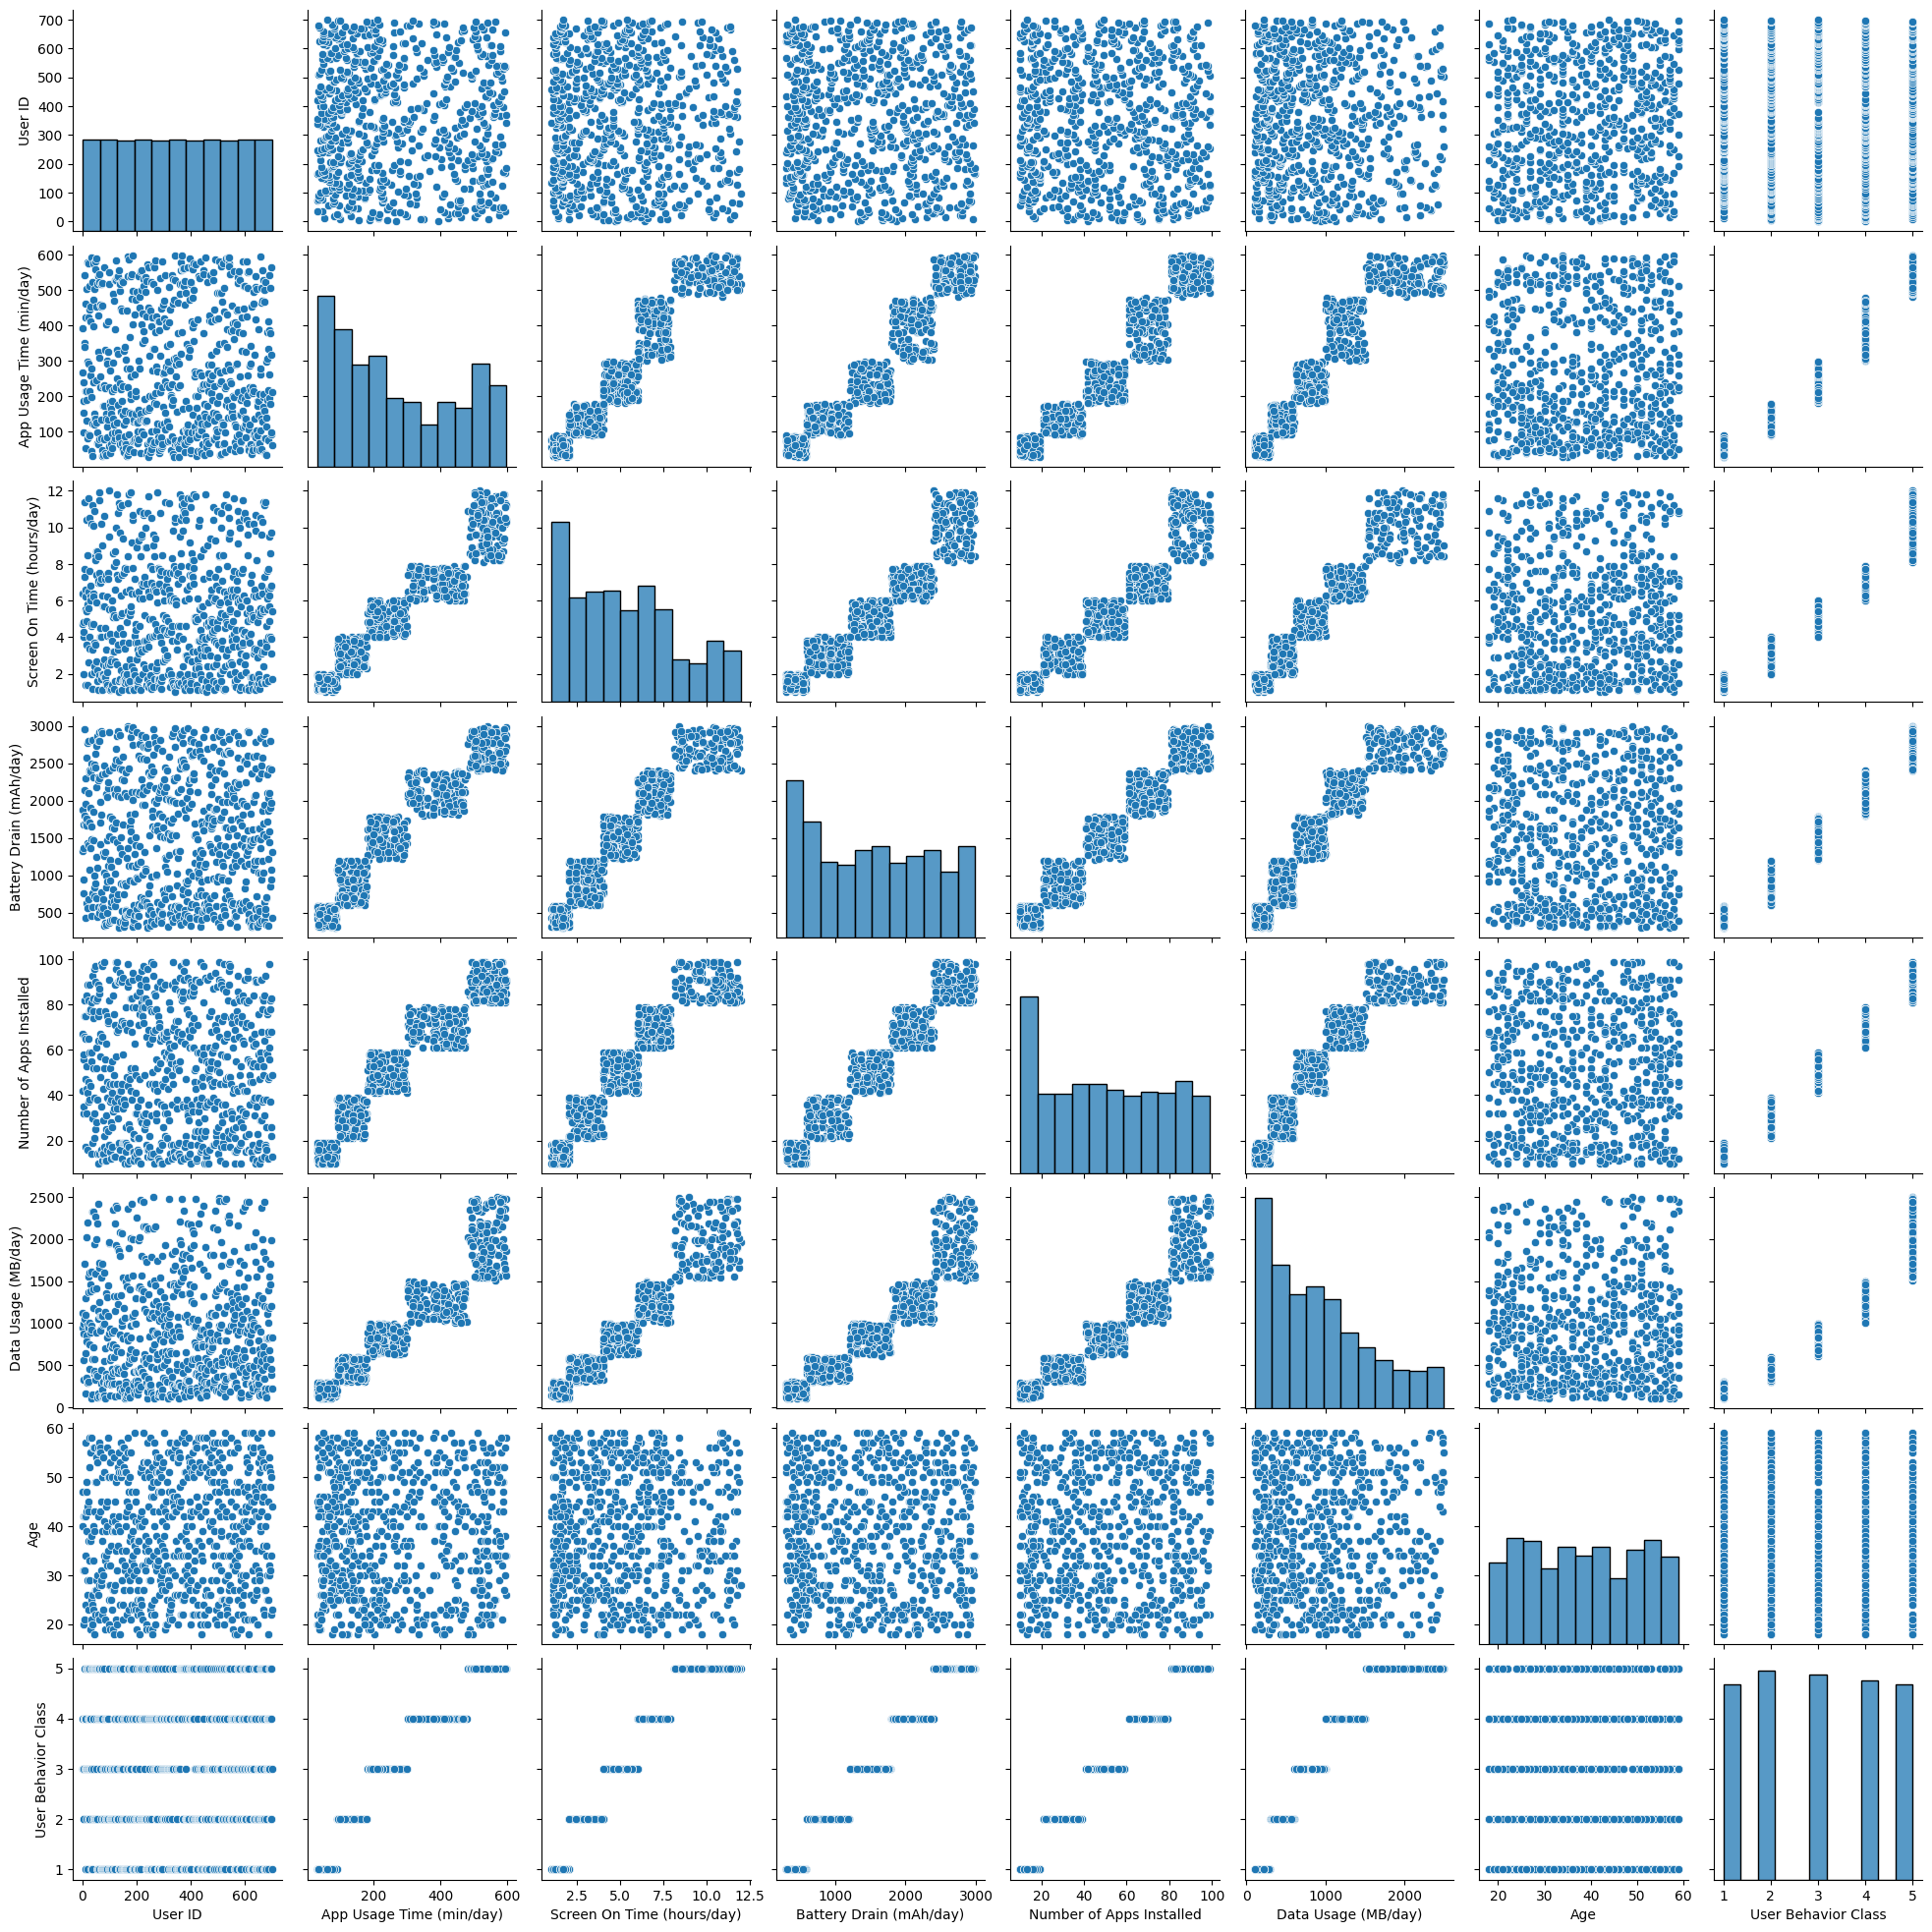

In [53]:
sns.pairplot(data)
plt.show()

# **Count plot for categorical columns**

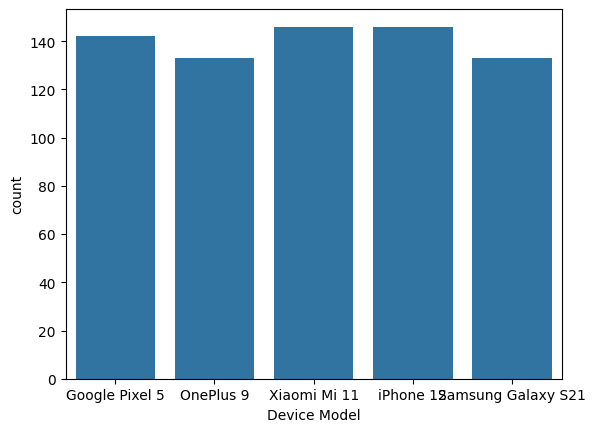

In [38]:
# device model
sns.countplot(x='Device Model', data=data)
plt.show()

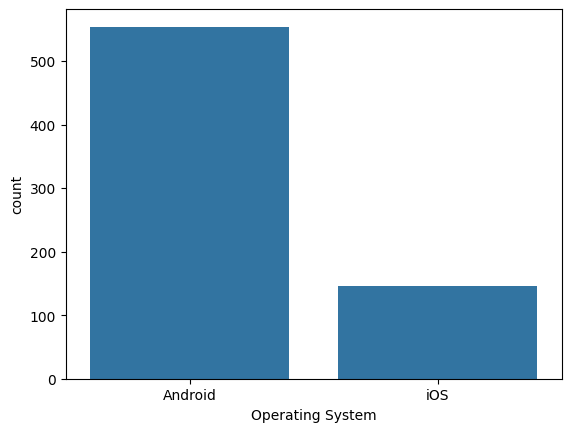

In [40]:
# operating system
sns.countplot(x='Operating System', data=data)
plt.show()

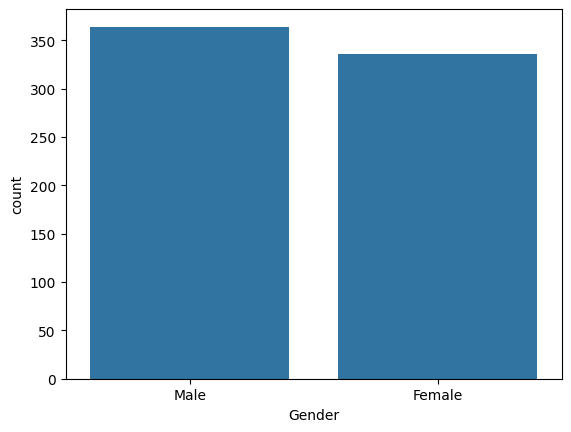

In [41]:
# Gender
sns.countplot(x='Gender', data=data)
plt.show()

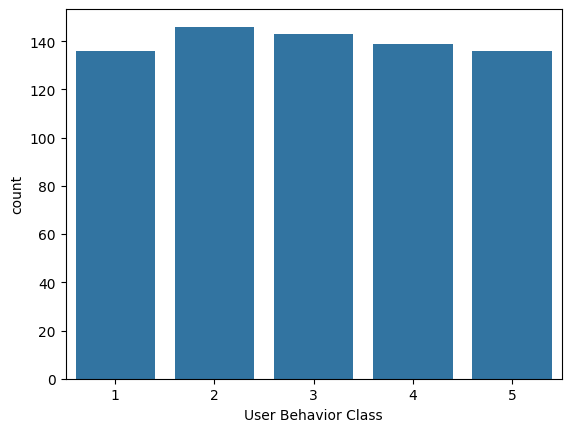

In [42]:
# User behavior class
sns.countplot(x='User Behavior Class', data=data)
plt.show()

# **Bar plot for categorical columns**

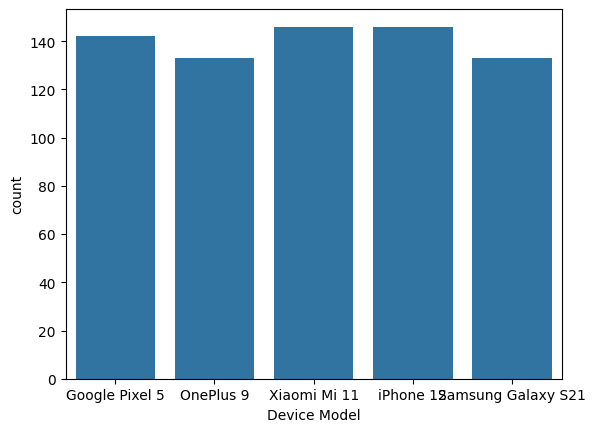

In [59]:
# Device Model
sns.countplot(x='Device Model', data=data)
plt.show()

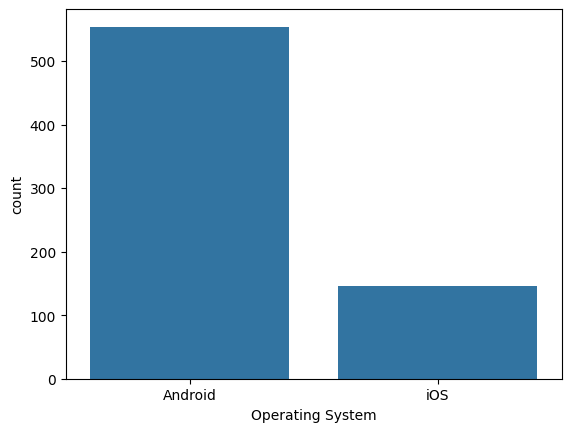

In [60]:
# Operating SYstem
sns.countplot(x='Operating System', data=data)
plt.show()

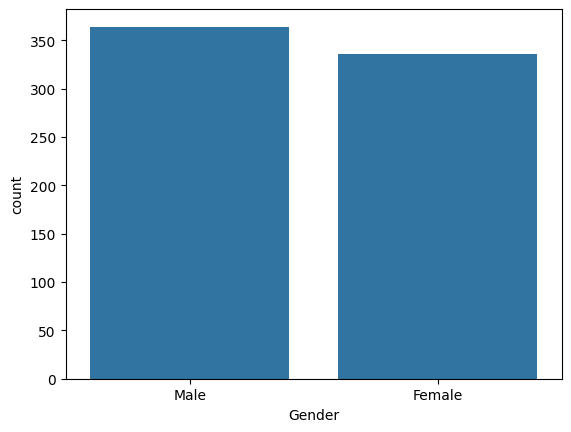

In [61]:
# Gender
sns.countplot(x='Gender', data=data)
plt.show()

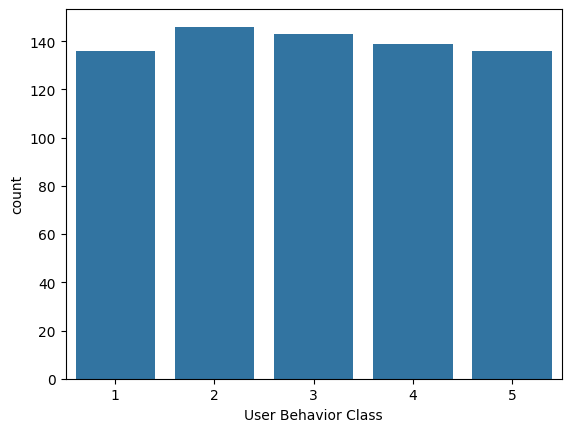

In [62]:
# User Behavior Class
sns.countplot(x='User Behavior Class', data=data)
plt.show()

# **Frequency count for categorical data**

In [48]:
# device model --> categorical column
data['Device Model'].value_counts()

,count
Device Model,
Xiaomi Mi 11,146
iPhone 12,146
Google Pixel 5,142
OnePlus 9,133
Samsung Galaxy S21,133


In [50]:
# operating system --> categorical column
data['Operating System'].value_counts()

,count
Operating System,
Android,554
iOS,146


In [51]:
# Gender --> categorical column
data['Gender'].value_counts()

,count
Gender,
Male,364
Female,336


In [52]:
# User Behavior Class --> categorical column
data['User Behavior Class'].value_counts()

,count
User Behavior Class,
2,146
3,143
4,139
5,136
1,136


# **Correlation matrix with heatmap**

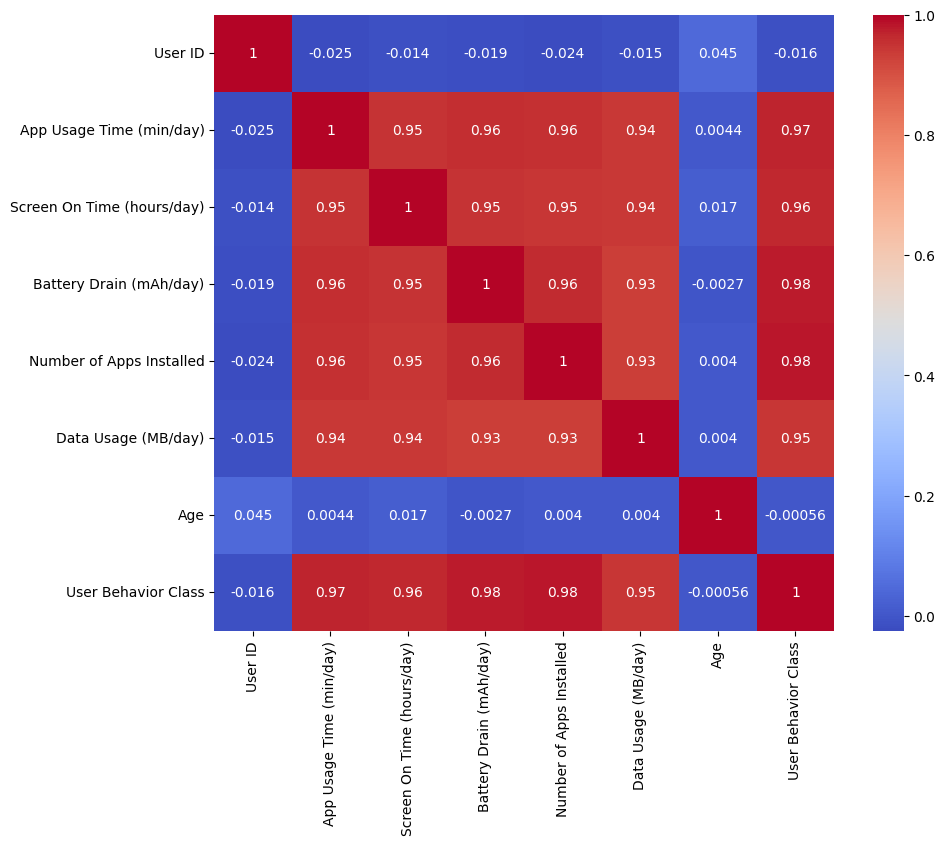

In [57]:
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Bar plot for outlier detection in numerical columns**

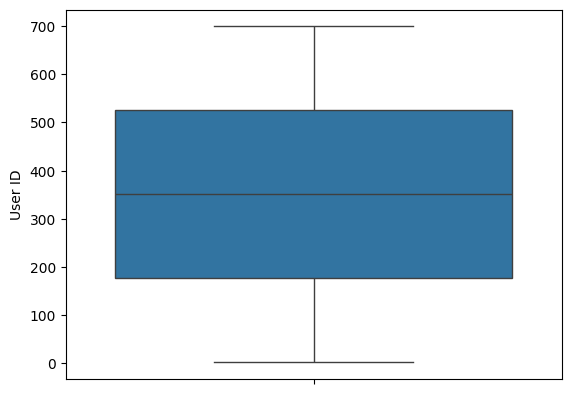

In [64]:
# USER ID --> numerical column
sns.boxplot(data=data['User ID'])
plt.show()

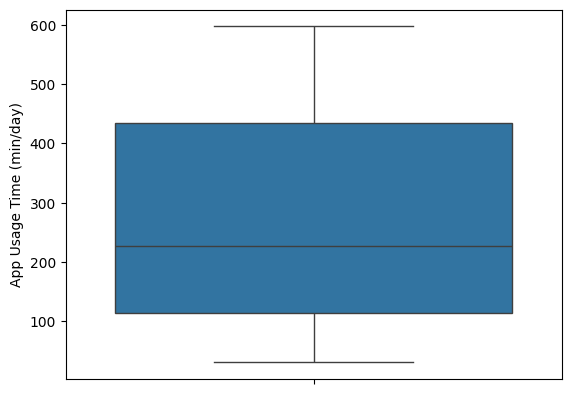

In [65]:
# App Usage Time (min/day)
sns.boxplot(data=data['App Usage Time (min/day)'])
plt.show()

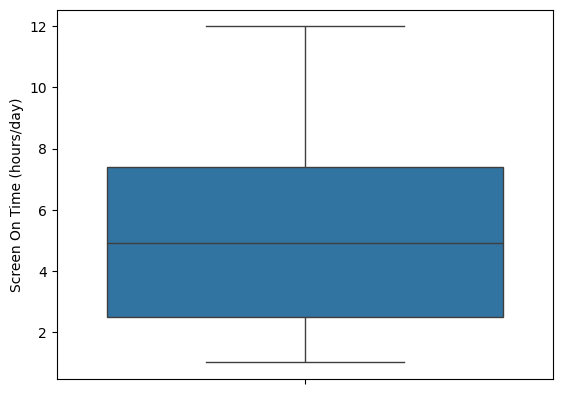

In [67]:
# Screen On Time (hours/day)
sns.boxplot(data=data['Screen On Time (hours/day)'])
plt.show()

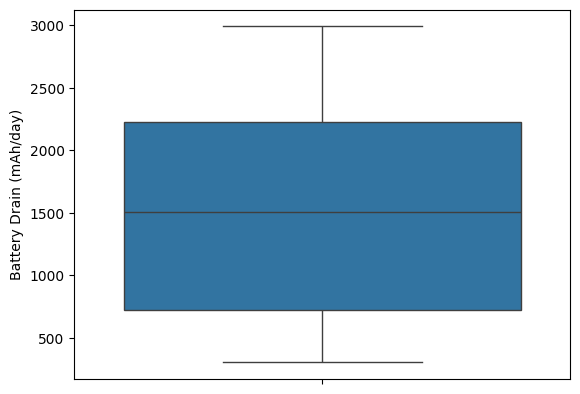

In [68]:
# Battery Drain (mAh/day)
sns.boxplot(data=data['Battery Drain (mAh/day)'])
plt.show()

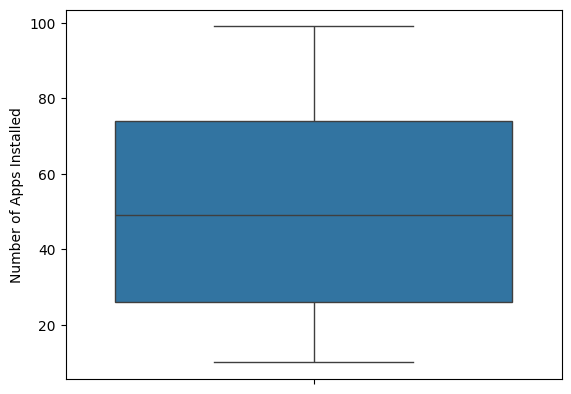

In [69]:
# Number of Apps Installed
sns.boxplot(data=data['Number of Apps Installed'])
plt.show()

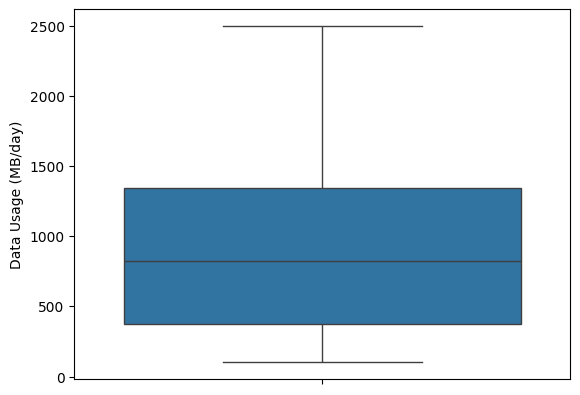

In [70]:
# Data Usage (MB/day)
sns.boxplot(data=data['Data Usage (MB/day)'])
plt.show()

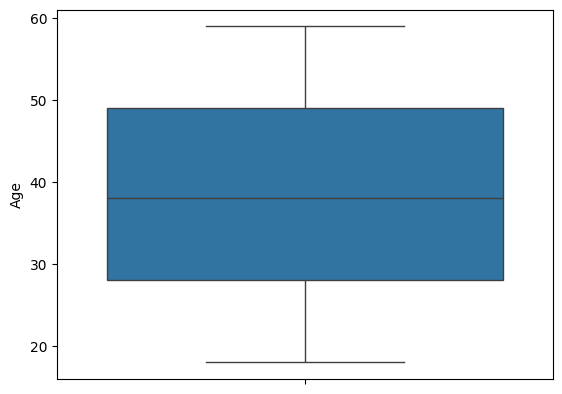

In [71]:
# Age
sns.boxplot(data=data['Age'])
plt.show()

# **Remove outlier by using z-score**

In [76]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data = data[(z_scores < 3).all(axis=1)]

# **Standardization**

In [77]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))

# **Normalization**

In [78]:
min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data.select_dtypes(include=[np.number]))

# **Encode Categorical Data**

In [79]:
# In this dataset, categorical columns are already encoded
data_encoded = pd.get_dummies(data, columns=['Device Model', 'Operating System', 'Gender', 'User Behavior Class'])

# **Dimensionality Reduction**

In [80]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data.select_dtypes(include=[np.number]))
print(pca.explained_variance_ratio_)

[0.93287551 0.0354428 ]
